In [82]:
# set up and libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar

pd.options.display.max_columns = None

# read the data in 
act_df = pd.read_csv('data/activities.csv')

# do some data cleaning of the column names
act_df.columns = act_df.columns.str.lower()
act_df.columns = act_df.columns.str.replace(' ', '_')

# only select the columns I want 
df2 = (
    act_df
    .filter(regex = 'activity|distance|commute|time|speed|elevation|grade|temperature')
    .copy()
)
# make some new columns for the date and time
df2['year'] = pd.DatetimeIndex(df2['activity_date']).year
df2['month'] = pd.DatetimeIndex(df2['activity_date']).month
df2['month_label'] = df2['month'].apply(lambda x: calendar.month_abbr[x])

df2.drop(columns = list(df2.filter(regex='span_class')), inplace = True)

In [32]:
# total number of each 
df3 = (
    df2
    .groupby(['activity_type'])['activity_id']
    .count()
    .reset_index(name="count")
    .sort_values('count', ascending = False)
)

sns.set(font='Arial')
sns.set_style()
sns.despine()
sns.barplot(x = 'activity_type', y = 'count', data = df3, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('All time activity counts since 2014\n');

In [ ]:
# most popular activity each year
(
    df2
    .groupby(['activity_type', 'year'])['activity_id']
    .count()
    .reset_index(name="count")
    .sort_values(['activity_type','year','count'], ascending = (True,True,False))
)


In [90]:
# total distance and number of rides each year  (focusing on rides as i dont really use the other options that much)
year_data = (
    df2
    .query("activity_type == 'Ride'")
    .groupby('year')
    .agg(distance_sum = ('distance','sum'), 
         total_rides = ('activity_id', 'count'), 
         time_spent = ('elapsed_time', 'sum'),
         time_spent_moving = ('moving_time', 'sum'),
         total_elevation = ('elevation_gain', 'sum'), 
         total_commutes = ('commute', 'sum'))
    .reset_index()     
)
year_data

,year,distance_sum,total_rides,time_spent,time_spent_moving,total_elevation,total_commutes
0,2014,1.85,1,540,499.0,22.470800,0
1,2015,2238.77,69,540544,454482.0,15906.077487,0
2,2016,838.45,29,175395,145512.0,5951.298218,5
3,2017,1288.84,34,295939,232350.0,14220.332603,0
4,2018,2023.77,107,522545,404706.0,18827.775206,67
5,2019,4297.93,222,1060224,800857.0,38051.155073,167
6,2020,3881.57,152,1214230,759468.0,39850.288162,29
7,2021,1983.82,107,450437,382325.0,18694.273735,41


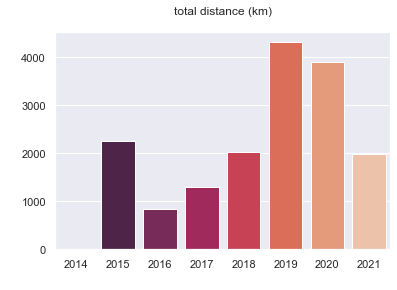

In [93]:
sns.barplot(x = 'year', y = 'distance_sum', data = year_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total distance (km)\n');

In [85]:
month_data = (
    df2
    .query("activity_type == 'Ride'")
    .groupby(['month','month_label'])
    .agg(distance_sum = ('distance','sum'), 
         total_rides = ('activity_id', 'count'), 
         time_spent = ('elapsed_time', 'sum'),
         time_spent_moving = ('moving_time', 'sum'),
         total_elevation = ('elevation_gain', 'sum'), 
         total_commutes = ('commute', 'sum'))
    .sort_values('month', ascending = True)     
)

month_data

,,distance_sum,total_rides,time_spent,time_spent_moving,total_elevation,total_commutes
month,month_label,,,,,,
1,Jan,975.29,45,204949,184920.0,6236.475760,24
2,Feb,820.84,55,188654,158808.0,6504.437423,31
3,Mar,939.39,48,218520,181816.0,8512.417587,25
4,Apr,1811.35,73,455948,349611.0,19641.503378,18
5,May,2102.74,69,625104,429055.0,21404.760775,14
6,Jun,1560.24,72,376902,292406.0,14444.988598,30
7,Jul,1594.88,80,391655,302514.0,13799.420811,45
8,Aug,1929.82,89,504117,376028.0,19341.018459,34
9,Sep,2319.99,76,719821,430489.0,17798.531918,34
